In [14]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split, GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from warnings import filterwarnings
filterwarnings('ignore')

# Prepare

In [15]:
# Data
df = pd.read_csv("../datas/Hitters.csv")
df = df.dropna()

# Dummie
dms = pd.get_dummies(df[['League', 'Division', 'NewLeague']])
y = df["Salary"]
X = df.drop(['Salary', 'League', 'Division', 'NewLeague'], axis=1)
X = pd.concat([X, dms[["League_N", "Division_W", "NewLeague_N"]]], axis=1)

# Test Train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state=42)

X_train = X_train[["Hits"]]
X_test = X_test[["Hits"]]

# Model

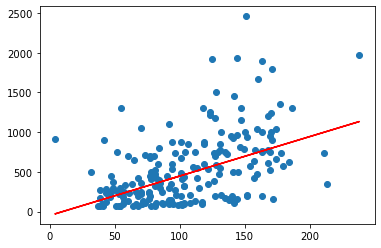

In [16]:
# Model
svr_model = SVR("linear").fit(X_train, y_train)

# Plot
y_pred = svr_model.predict(X_train)
plt.scatter(X_train, y_train)
plt.plot(X_train, y_pred, color="red");

# Predict

In [17]:
y_pred = svr_model.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

459.0187960365147

# Model Tuning

In [18]:
svr_params = {"C": np.arange(0.1,2,0.1)}
svr_cv_model = GridSearchCV(svr_model, svr_params, cv=10).fit(X_train, y_train)
print("Best Parameter:",pd.Series(svr_cv_model.best_params_)[0])

# Tuned SVR
svr_tuned = SVR("linear", C = pd.Series(svr_cv_model.best_params_)[0]).fit(X_train, y_train)

# Calculate Test MSE
y_pred = svr_tuned.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_pred))

Best Parameter: 0.1


458.198966781116